In [1]:
conda install -c conda-forage mlxtend


Note: you may need to restart the kernel to use updated packages.


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: mlxtend


In [1]:
pip install mlxtend

     ---------------------------------------- 1.3/1.3 MB 5.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules

In [3]:
pd.set_option("display.max_rows",500)

In [4]:
ls

 Volume in drive C is Windows
 Volume Serial Number is AE0D-904C

 Directory of C:\Users\Suhas\Desktop\data science

03-02-2023  20:27    <DIR>          .
29-01-2023  07:32    <DIR>          ..
03-02-2023  16:00    <DIR>          .ipynb_checkpoints
29-01-2023  16:56           207,047 Beml and glaxo.ipynb
28-01-2023  10:44           103,983 BEML.csv
01-02-2023  08:52             3,527 Cars.csv
02-02-2023  10:23            29,822 claimants.csv
28-01-2023  10:47            97,587 GLAXO .csv
30-01-2023  18:25             9,058 hypothesis Testing.ipynb
03-02-2023  16:55             7,427 interview prepearation questions .docx
30-01-2023  17:22            45,567 introduction to python c1.ipynb
31-01-2023  15:54           171,210 LinearRegression.ipynb
02-02-2023  16:08            70,862 Logistic regression.ipynb
26-01-2023  15:45            27,823 loops, map & filter, exception handling,recursion(c2).ipynb
27-01-2023  21:45           406,383 matplotlib,seaborn.ipynb
03-02-2023  16:03        

In [5]:
titanic = pd.read_csv("titanic.csv")

In [6]:
titanic.head()

,Class,Gender,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No


In [7]:
titanic.shape

(2201, 4)

In [8]:
for i in titanic.columns:
    print(i)
    print(titanic[i].value_counts())
    print()

Class
Crew    885
3rd     706
1st     325
2nd     285
Name: Class, dtype: int64

Gender
Male      1731
Female     470
Name: Gender, dtype: int64

Age
Adult    2092
Child     109
Name: Age, dtype: int64

Survived
No     1490
Yes     711
Name: Survived, dtype: int64



In [9]:
#preprocessing

In [10]:
titanic.head(3)

,Class,Gender,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No


In [11]:
df = pd.get_dummies(titanic)
df.head()

,Class_1st,Class_2nd,Class_3rd,Class_Crew,Gender_Female,Gender_Male,Age_Adult,Age_Child,Survived_No,Survived_Yes
0,0,0,1,0,0,1,0,1,1,0
1,0,0,1,0,0,1,0,1,1,0
2,0,0,1,0,0,1,0,1,1,0
3,0,0,1,0,0,1,0,1,1,0
4,0,0,1,0,0,1,0,1,1,0


In [12]:
# apriori algorithm

In [14]:
frequent_itemsets = apriori(df,min_support = 0.1,use_colnames= True)
frequent_itemsets

C:\Users\Suhas\New folder\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.147660,(Class_1st)
1,0.129487,(Class_2nd)
2,0.320763,(Class_3rd)
3,0.402090,(Class_Crew)
4,0.213539,(Gender_Female)
5,0.786461,(Gender_Male)
6,0.950477,(Age_Adult)
7,0.676965,(Survived_No)
8,0.323035,(Survived_Yes)
9,0.144934,"(Class_1st, Age_Adult)"


In [19]:
rules = association_rules(frequent_itemsets,metric = "lift",min_threshold = 1.3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Survived_Yes),(Gender_Female),0.323035,0.213539,0.156293,0.483826,2.265745,0.087312,1.523634
1,(Gender_Female),(Survived_Yes),0.213539,0.323035,0.156293,0.731915,2.265745,0.087312,2.525187
2,"(Age_Adult, Survived_Yes)",(Gender_Female),0.297138,0.213539,0.143571,0.483180,2.262724,0.080121,1.521732
3,"(Age_Adult, Gender_Female)",(Survived_Yes),0.193094,0.323035,0.143571,0.743529,2.301699,0.081195,2.639542
4,(Survived_Yes),"(Age_Adult, Gender_Female)",0.323035,0.193094,0.143571,0.444444,2.301699,0.081195,1.452431
5,(Gender_Female),"(Age_Adult, Survived_Yes)",0.213539,0.297138,0.143571,0.672340,2.262724,0.080121,2.145099
6,"(Age_Adult, Gender_Male)","(Class_Crew, Survived_No)",0.757383,0.305770,0.304407,0.401920,1.314450,0.072822,1.160764
7,"(Class_Crew, Survived_No)","(Age_Adult, Gender_Male)",0.305770,0.757383,0.304407,0.995542,1.314450,0.072822,54.427079


In [20]:
rules = association_rules(frequent_itemsets,metric = "lift",min_threshold = 1.1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Survived_No),(Class_3rd),0.676965,0.320763,0.239891,0.354362,1.104747,0.022745,1.052040
1,(Class_3rd),(Survived_No),0.320763,0.676965,0.239891,0.747875,1.104747,0.022745,1.281251
2,(Gender_Male),(Class_Crew),0.786461,0.402090,0.391640,0.497978,1.238474,0.075412,1.191004
3,(Class_Crew),(Gender_Male),0.402090,0.786461,0.391640,0.974011,1.238474,0.075412,8.216621
4,(Class_Crew),(Survived_No),0.402090,0.676965,0.305770,0.760452,1.123325,0.033569,1.348519
5,(Survived_No),(Class_Crew),0.676965,0.402090,0.305770,0.451678,1.123325,0.033569,1.090436
6,(Survived_Yes),(Gender_Female),0.323035,0.213539,0.156293,0.483826,2.265745,0.087312,1.523634
7,(Gender_Female),(Survived_Yes),0.213539,0.323035,0.156293,0.731915,2.265745,0.087312,2.525187
8,(Gender_Male),(Survived_No),0.786461,0.676965,0.619718,0.787984,1.163995,0.087312,1.523634
9,(Survived_No),(Gender_Male),0.676965,0.786461,0.619718,0.915436,1.163995,0.087312,2.525187


In [21]:
#recomendation engine

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [23]:
pd.set_option("display.max_rows",50)

In [25]:
movies = pd.read_csv("Movie.csv")

In [26]:
movies.head()

,userId,movie,rating
0,3,Toy Story (1995),4.0
1,6,Toy Story (1995),5.0
2,8,Toy Story (1995),4.0
3,10,Toy Story (1995),4.0
4,11,Toy Story (1995),4.5


In [28]:
movies.shape

(8992, 3)

In [32]:
movies[movies["userId"]==11]

,userId,movie,rating
4,11,Toy Story (1995),4.5
7446,11,GoldenEye (1995),2.5


In [34]:
movies.isna().sum()

userId    0
movie     0
rating    0
dtype: int64

In [35]:
movies["rating"].value_counts()

3.0    2736
4.0    2660
5.0    1394
3.5     679
2.0     542
4.5     374
2.5     277
1.0     212
1.5      61
0.5      57
Name: rating, dtype: int64

<AxesSubplot:>

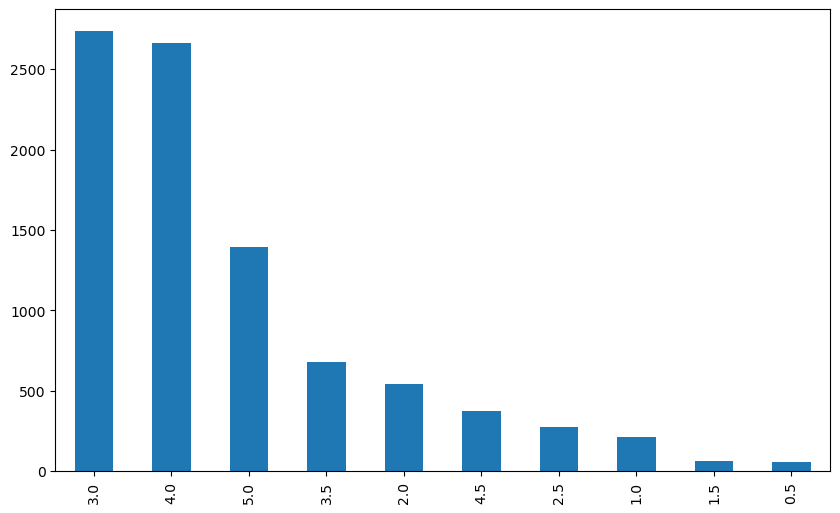

In [37]:
plt.figure(figsize = (10,6))
movies["rating"].value_counts().plot(kind = "bar")

In [38]:
#number of unique users in the dataset
len(movies.userId.unique())

4081

In [39]:
len(movies.movie.unique())

10

In [40]:
movies.movie.unique()

array(['Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)',
       'Waiting to Exhale (1995)', 'Father of the Bride Part II (1995)',
       'Heat (1995)', 'Sabrina (1995)', 'Tom and Huck (1995)',
       'Sudden Death (1995)', 'GoldenEye (1995)'], dtype=object)

In [42]:
user_movies = movies.pivot(index = "userId",
                          columns = "movie",
                          values = "rating")

In [43]:
user_movies

movie,Father of the Bride Part II (1995),GoldenEye (1995),Grumpier Old Men (1995),Heat (1995),Jumanji (1995),Sabrina (1995),Sudden Death (1995),Tom and Huck (1995),Toy Story (1995),Waiting to Exhale (1995)
userId,,,,,,,,,,
1,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
4,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7115,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7116,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
7117,NaN,3.0,4.0,5.0,NaN,3.0,1.0,NaN,4.0,NaN


In [44]:
user_movies.fillna(0,inplace = True)

In [45]:
user_movies

movie,Father of the Bride Part II (1995),GoldenEye (1995),Grumpier Old Men (1995),Heat (1995),Jumanji (1995),Sabrina (1995),Sudden Death (1995),Tom and Huck (1995),Toy Story (1995),Waiting to Exhale (1995)
userId,,,,,,,,,,
1,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
4,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7115,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7116,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
7117,0.0,3.0,4.0,5.0,0.0,3.0,1.0,0.0,4.0,0.0


In [46]:
#calculating the cosine similarity between users

In [47]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine,correlation

In [49]:
user_sim = 1- pairwise_distances(user_movies.values,metric = 'cosine')

In [50]:
user_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.55337157],
       [0.        , 1.        , 0.        , ..., 0.45883147, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.45883147, 1.        ,
        0.62254302],
       ...,
       [0.        , 0.45883147, 0.45883147, ..., 1.        , 0.45883147,
        0.47607054],
       [0.        , 0.        , 1.        , ..., 0.45883147, 1.        ,
        0.62254302],
       [0.55337157, 0.        , 0.62254302, ..., 0.47607054, 0.62254302,
        1.        ]])

In [51]:
#store the results in a dataframe

In [52]:
user_sim_df = pd.DataFrame(user_sim)

In [53]:
user_sim_df.shape

(4081, 4081)

In [54]:
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080
0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
1,0.000000,1.000000,0.000000,0.000000,0.000000,0.390567,0.707107,0.615457,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.458831,0.000000,0.000000
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,1.000000,0.622543
3,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.615457,0.000000,0.388514,...,0.800000,0.000000,0.000000,0.000000,0.989949,0.000000,0.000000,0.619422,0.000000,0.000000
4,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4076,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.658505,0.000000,0.000000,0.000000
4077,0.000000,0.000000,0.752577,0.000000,0.000000,0.489886,0.000000,0.370543,0.752577,0.657870,...,0.000000,0.752577,0.000000,0.532152,0.000000,0.658505,1.000000,0.345306,0.752577,0.468511
4078,0.000000,0.458831,0.458831,0.619422,0.000000,0.701884,0.567775,0.889532,0.458831,0.568212,...,0.344124,0.458831,0.000000,0.324443,0.648886,0.000000,0.345306,1.000000,0.458831,0.476071
4079,0.000000,0.000000,1.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,1.000000,0.622543


In [55]:
#set the index and column names to user ids

In [56]:
user_sim_df.index = list(user_movies.index)
user_sim_df.columns = list(user_movies.index)

In [57]:
user_sim_df

,1,2,3,4,5,6,7,8,10,11,...,7105,7107,7108,7110,7113,7115,7116,7117,7119,7120
1,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
2,0.000000,1.000000,0.000000,0.000000,0.000000,0.390567,0.707107,0.615457,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.458831,0.000000,0.000000
3,0.000000,0.000000,1.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,1.000000,0.622543
4,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.615457,0.000000,0.388514,...,0.800000,0.000000,0.000000,0.000000,0.989949,0.000000,0.000000,0.619422,0.000000,0.000000
5,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7115,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.658505,0.000000,0.000000,0.000000
7116,0.000000,0.000000,0.752577,0.000000,0.000000,0.489886,0.000000,0.370543,0.752577,0.657870,...,0.000000,0.752577,0.000000,0.532152,0.000000,0.658505,1.000000,0.345306,0.752577,0.468511
7117,0.000000,0.458831,0.458831,0.619422,0.000000,0.701884,0.567775,0.889532,0.458831,0.568212,...,0.344124,0.458831,0.000000,0.324443,0.648886,0.000000,0.345306,1.000000,0.458831,0.476071
7119,0.000000,0.000000,1.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,1.000000,0.622543


In [59]:
np.fill_diagonal(user_sim,0)
user_sim_df.iloc[0:5,0:5]

,1,2,3,4,5
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0


In [60]:
user_sim_df


,1,2,3,4,5,6,7,8,10,11,...,7105,7107,7108,7110,7113,7115,7116,7117,7119,7120
1,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.390567,0.707107,0.615457,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.458831,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,1.000000,0.622543
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.615457,0.000000,0.388514,...,0.800000,0.000000,0.000000,0.000000,0.989949,0.000000,0.000000,0.619422,0.000000,0.000000
5,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.553372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7115,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.658505,0.000000,0.000000,0.000000
7116,0.000000,0.000000,0.752577,0.000000,0.000000,0.489886,0.000000,0.370543,0.752577,0.657870,...,0.000000,0.752577,0.000000,0.532152,0.000000,0.658505,0.000000,0.345306,0.752577,0.468511
7117,0.000000,0.458831,0.458831,0.619422,0.000000,0.701884,0.567775,0.889532,0.458831,0.568212,...,0.344124,0.458831,0.000000,0.324443,0.648886,0.000000,0.345306,0.000000,0.458831,0.476071
7119,0.000000,0.000000,1.000000,0.000000,0.000000,0.650945,0.000000,0.492366,1.000000,0.874157,...,0.000000,1.000000,0.000000,0.707107,0.000000,0.000000,0.752577,0.458831,0.000000,0.622543


In [61]:
user_sim_df.sort_values([8],ascending = False).head(100)

,1,2,3,4,5,6,7,8,10,11,...,7105,7107,7108,7110,7113,7115,7116,7117,7119,7120
4831,0.000000,0.555136,0.555136,0.618580,0.000000,0.578181,0.392541,0.995703,0.555136,0.716360,...,0.475831,0.555136,0.000000,0.392541,0.616849,0.000000,0.417782,0.900596,0.555136,0.345596
614,0.000000,0.520266,0.520266,0.676346,0.000000,0.541863,0.367884,0.992625,0.520266,0.707458,...,0.520266,0.520266,0.000000,0.367884,0.674453,0.000000,0.391540,0.905125,0.520266,0.323888
2274,0.000000,0.482418,0.422116,0.759809,0.000000,0.463191,0.341121,0.972373,0.422116,0.632564,...,0.542720,0.422116,0.000000,0.298481,0.767523,0.000000,0.317675,0.913063,0.422116,0.262785
5043,0.000000,0.420589,0.600842,0.672943,0.000000,0.555383,0.297402,0.968856,0.600842,0.758666,...,0.480673,0.600842,0.000000,0.424859,0.679775,0.000000,0.452180,0.909761,0.600842,0.374050
5843,0.000000,0.380235,0.633724,0.671748,0.000000,0.561026,0.268866,0.959475,0.633724,0.800186,...,0.506979,0.633724,0.000000,0.448111,0.672166,0.000000,0.476926,0.894126,0.633724,0.394521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6636,0.000000,0.404226,0.646762,0.388057,0.000000,0.578883,0.285831,0.806060,0.646762,0.565371,...,0.000000,0.646762,0.000000,0.457330,0.457330,0.000000,0.486738,0.853169,0.646762,0.402637
188,0.000000,0.218218,0.654654,0.567367,0.000000,0.511372,0.154303,0.805823,0.654654,0.678246,...,0.218218,0.654654,0.000000,0.462910,0.617213,0.218218,0.636375,0.851064,0.654654,0.407550
2140,0.000000,0.512148,0.512148,0.384111,0.000000,0.533407,0.362143,0.803773,0.512148,0.447697,...,0.000000,0.512148,0.000000,0.362143,0.452679,0.256074,0.554056,0.837150,0.512148,0.318834
271,0.435194,0.609272,0.261116,0.487417,0.435194,0.407934,0.430820,0.803530,0.261116,0.524145,...,0.609272,0.261116,0.435194,0.492366,0.430820,0.000000,0.196510,0.609026,0.261116,0.403380


In [62]:
#most similar users
movies[(movies["userId"]==0)| (movies["userId"]==6636)]

,userId,movie,rating
2406,6636,Toy Story (1995),4.0
4365,6636,Grumpier Old Men (1995),2.5
6388,6636,Heat (1995),4.0


In [64]:
def get_reco(customer_id):
    tem = list(user_sim_df.sort_values([customer_id],ascending = False).head(100).index)
    movie_list = []
    for i in tem:
        movie_list = movie_list +list(movies[movies["userId"]== i ]["movie"])
    return set(movie_list)-set(movies[movies["userId"]== customer_id]["movie"])

In [65]:
get_reco(11)

{'Heat (1995)', 'Jumanji (1995)', 'Waiting to Exhale (1995)'}